# Bee count chart

In [1]:
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%load_ext lab_black

In [2]:
def getImage(path, zoom=0.15):
    return OffsetImage(plt.imread(path), zoom=zoom)

In [3]:
df_bee_data = pd.read_excel(
    "./data/habitatconditionnaturalcapitaluksupplementaryinformation1.xlsx",
    sheet_name="Bees",
)

In [4]:
df_bee_data.columns = [
    "year",
    "coastal_avg_bees_km",
    "mountains_avg_bees_km",
    "woodland_avg_bees_km",
    "farmland_avg_bees_km",
    "grassland_avg_bees_km",
    "wetlands_avg_bees_km",
    "coastal_avg_queens_km",
    "mountains_avg_queens_km",
    "woodland_avg_queens_km",
    "farmland_avg_queens_km",
    "grassland_avg_queens_km",
    "wetlands_avg_queens_km",
]
df_bee_data = df_bee_data.drop([0, 1, 2, 14])
df_bee_data_std = df_bee_data[13:].reset_index(drop=True)
df_bee_data = df_bee_data[:11].reset_index(drop=True)

In [5]:
df_bee_data

,year,coastal_avg_bees_km,mountains_avg_bees_km,woodland_avg_bees_km,farmland_avg_bees_km,grassland_avg_bees_km,wetlands_avg_bees_km,coastal_avg_queens_km,mountains_avg_queens_km,woodland_avg_queens_km,farmland_avg_queens_km,grassland_avg_queens_km,wetlands_avg_queens_km
0,2010,32.372777,41.213888,22.650735,16.768771,27.925134,26.8782,3.69596,2.959405,4.671286,2.532209,2.502173,3.163663
1,2011,21.563177,28.968549,13.705228,20.646111,27.715316,22.844955,3.858094,2.201536,1.41101,1.446305,2.695375,1.230338
2,2012,20.53932,34.400078,17.706123,12.630903,36.67213,28.030626,5.854029,4.163148,2.413931,3.204527,4.370043,7.678332
3,2013,18.023429,22.864623,21.916168,20.493649,33.351733,44.083652,1.143289,1.629594,2.952292,1.314721,3.270041,4.075181
4,2014,17.769251,33.344386,18.269952,52.911965,35.889013,27.718039,1.571255,4.803747,3.284414,5.996114,3.899315,4.388133
5,2015,22.859323,31.697095,21.91585,63.05278,36.807657,36.046584,2.120814,3.768974,2.902316,3.315597,3.516665,3.790103
6,2016,27.794799,35.445446,23.142404,44.446059,36.832675,25.840049,2.496831,3.53889,4.233611,3.36689,3.128577,3.561082
7,2017,34.985582,34.84974,22.616908,38.63518,43.566183,30.691406,2.290467,4.366571,2.127616,2.70453,3.241755,2.790214
8,2018,20.137104,28.653998,20.751726,32.394354,35.551348,23.423679,3.516842,4.258414,3.047067,1.817837,3.766608,2.227801
9,2019,45.288576,31.464962,23.070283,33.067197,36.396245,25.517125,5.03438,3.563807,2.336281,2.135974,2.564617,3.249267


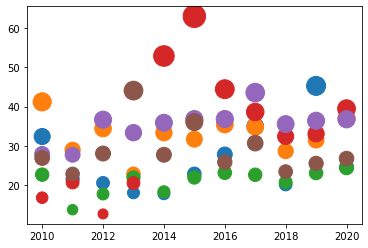

In [6]:
# Size of data point: https://stackoverflow.com/questions/48372985/how-to-annotate-two-values-one-inside-and-one-outside-the-bubble-for-matplotlib
# Make data point an image: https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points or https://stackoverflow.com/questions/14324270/matplotlib-custom-marker-symbol
# Image: https://www.tutorialspoint.com/matplotlib-plot-over-an-image-background-in-python
# create scatter plot
fig, ax = plt.subplots()
for col in [
    "coastal_avg_bees_km",
    "mountains_avg_bees_km",
    "woodland_avg_bees_km",
    "farmland_avg_bees_km",
    "grassland_avg_bees_km",
    "wetlands_avg_bees_km",
]:

    ax.scatter(
        df_bee_data.year.values,
        df_bee_data[col].values,
        s=df_bee_data[col].multiply(8).to_list(),
        marker="o",
    )

plt.show()

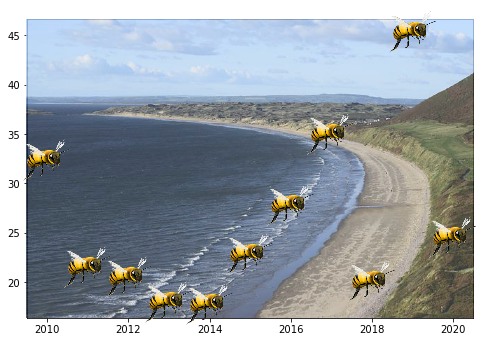

In [7]:
fig, ax = plt.subplots(figsize=(8, 5.5))
x = df_bee_data.year.values
y = df_bee_data.coastal_avg_bees_km.values
ax.scatter(
    df_bee_data.year.values,
    df_bee_data.coastal_avg_bees_km.values,
)
# https://stackoverflow.com/questions/51809017/add-transparent-picture-over-plot
planeImg = Image.open("./data/coast.jpeg")
planeImg.putalpha(200)
imagebox = OffsetImage(planeImg, zoom=0.7)
ab = AnnotationBbox(imagebox, (2015, 31.5), frameon=False)
ax.add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/bee6.png"), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.show()

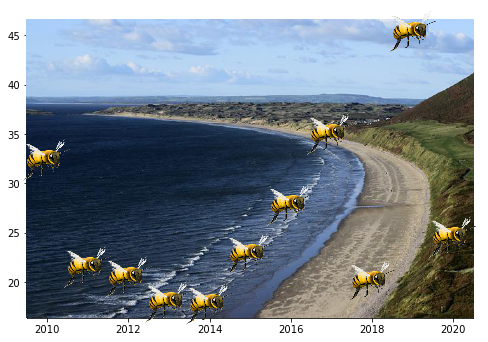

In [8]:
fig, ax = plt.subplots(figsize=(8, 5.5))
x = df_bee_data.year.values
y = df_bee_data.coastal_avg_bees_km.values
ax.scatter(
    df_bee_data.year.values,
    df_bee_data.coastal_avg_bees_km.values,
)
ab = AnnotationBbox(
    getImage("./data/coast.jpeg", zoom=0.7), (2015, 31.5), frameon=False
)
ax.add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/bee6.png"), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.show()

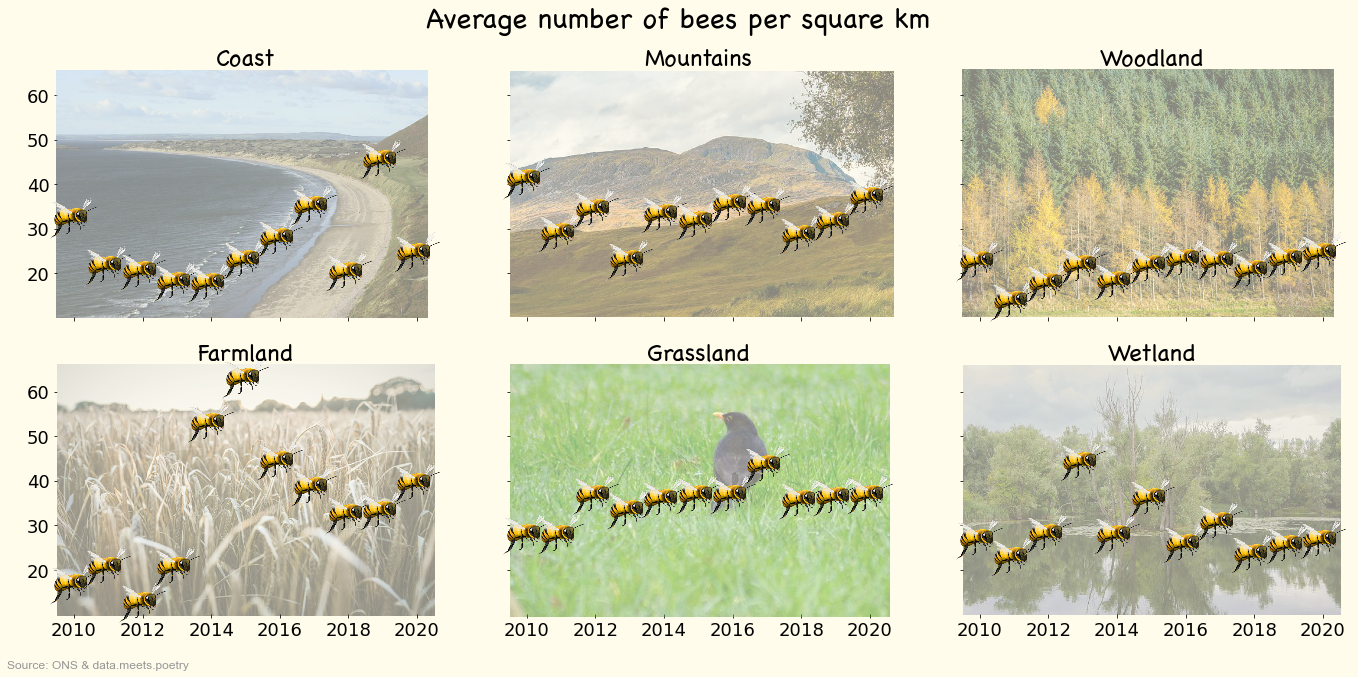

In [24]:
font = "Chalkboard"
bee = "bee6"
fig, axs = plt.subplots(2, 3, figsize=(23, 10), sharex=True, sharey=True)
plt.box(on=None)
# Find best colour: https://www.colorhexa.com/ffd700
# fig.patch.set_facecolor("#d8b600")
fig.patch.set_facecolor("#fffceb")
plt.text(
    x=0.5,
    y=0.94,
    s="Average number of bees per square km",
    fontsize=28,
    fontname=font,
    ha="center",
    transform=fig.transFigure,
)
plt.text(
    x=0.15,
    y=0.05,
    s="Source: ONS & data.meets.poetry",
    fontsize=12,
    fontname="Arial",
    color="#969696",
    ha="center",
    transform=fig.transFigure,
)

# Coast
x = df_bee_data.year.values
y = df_bee_data.coastal_avg_bees_km.values
axs[0, 0].scatter(
    x,
    y,
)

planeImg = Image.open("./data/coast.jpeg")
planeImg.putalpha(120)
imagebox = OffsetImage(planeImg, zoom=0.58)
ab = AnnotationBbox(imagebox, (2014.9, 37.8), frameon=False)
axs[0, 0].add_artist(ab)

for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[0, 0].add_artist(ab)
axs[0, 0].set_title("Coast", fontdict={"fontsize": 24, "fontname": font})

# Mountain
x = df_bee_data.year.values
y = df_bee_data.mountains_avg_bees_km.values
axs[0, 1].scatter(
    x,
    y,
)

planeImg = Image.open("./data/mountain.jpeg")
planeImg.putalpha(120)
imagebox = OffsetImage(planeImg, zoom=0.6)
ab = AnnotationBbox(imagebox, (2015.1, 37.8), frameon=False)
axs[0, 1].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[0, 1].add_artist(ab)
axs[0, 1].set_title("Mountains", fontdict={"fontsize": 24, "fontname": font})

# Woodland
x = df_bee_data.year.values
y = df_bee_data.woodland_avg_bees_km.values
axs[0, 2].scatter(
    x,
    y,
)

planeImg = Image.open("./data/woodland.jpeg")
planeImg.putalpha(120)
imagebox = OffsetImage(planeImg, zoom=0.58)
ab = AnnotationBbox(imagebox, (2014.9, 37.8), frameon=False)
axs[0, 2].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(
        getImage("./data/" + bee + ".png"),
        (x0, y0),
        frameon=False,
    )
    axs[0, 2].add_artist(ab)
axs[0, 2].set_title("Woodland", fontdict={"fontsize": 24, "fontname": font})

# Farmland
x = df_bee_data.year.values
y = df_bee_data.farmland_avg_bees_km.values
axs[1, 0].scatter(
    x,
    y,
)

planeImg = Image.open("./data/farmland.jpeg")
planeImg.putalpha(120)
imagebox = OffsetImage(planeImg, zoom=0.59)
ab = AnnotationBbox(imagebox, (2015, 37.8), frameon=False)
axs[1, 0].add_artist(ab)

for x0, y0 in zip(x, y):
    ab = AnnotationBbox(
        getImage("./data/" + bee + ".png"),
        (x0, y0),
        frameon=False,
    )
    axs[1, 0].add_artist(ab)
axs[1, 0].set_title("Farmland", fontdict={"fontsize": 24, "fontname": font})

# grassland
x = df_bee_data.year.values
y = df_bee_data.grassland_avg_bees_km.values
axs[1, 1].scatter(
    x,
    y,
)

planeImg = Image.open("./data/grassland cropped.jpeg")
planeImg.putalpha(120)
imagebox = OffsetImage(planeImg, zoom=0.7)
ab = AnnotationBbox(imagebox, (2015.03, 37.8), frameon=False)
axs[1, 1].add_artist(ab)

for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[1, 1].add_artist(ab)
axs[1, 1].set_title("Grassland", fontdict={"fontsize": 24, "fontname": font})


# wetlands
x = df_bee_data.year.values
y = df_bee_data.wetlands_avg_bees_km.values
axs[1, 2].scatter(
    x,
    y,
)

planeImg = Image.open("./data/wetland.jpeg")
planeImg.putalpha(120)
imagebox = OffsetImage(planeImg, zoom=0.59)
ab = AnnotationBbox(imagebox, (2015, 37.8), frameon=False)
axs[1, 2].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[1, 2].add_artist(ab)
axs[1, 2].set_title("Wetland", fontdict={"fontsize": 24, "fontname": font})

for ax in axs.flat:
    # ax.set(xlabel="x-label", ylabel="y-label")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    # set tick labels font size for both axes
    ax.tick_params(axis="both", which="major", labelsize=18)
    # set color to same as background
    ax.patch.set_facecolor("#fffceb")

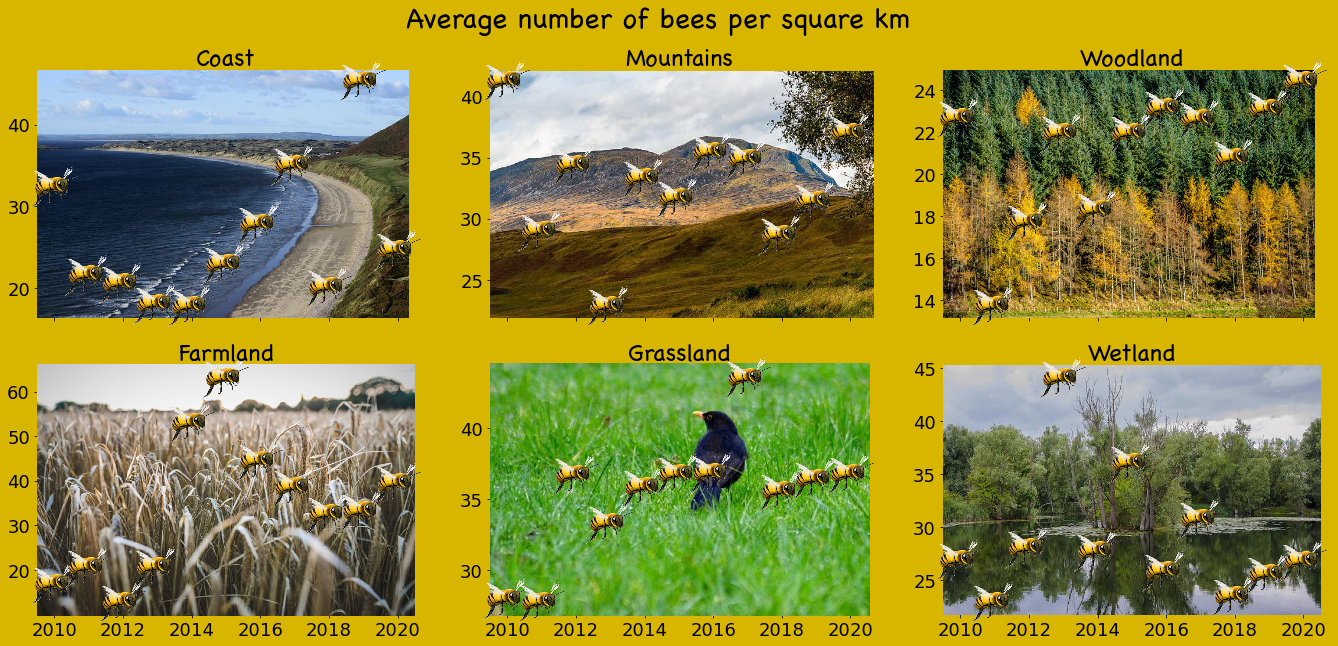

In [22]:
font = "Chalkboard"
bee = "bee6"
fig, axs = plt.subplots(2, 3, figsize=(23, 10), sharex=True)  # sharey=True)
plt.box(on=None)
#Find best colour: https://www.colorhexa.com/ffd700
fig.patch.set_facecolor("#d8b600")

plt.text(
    x=0.5,
    y=0.94,
    s="Average number of bees per square km",
    fontsize=28,
    fontname=font,
    ha="center",
    transform=fig.transFigure,
)

# Coast
x = df_bee_data.year.values
y = df_bee_data.coastal_avg_bees_km.values
axs[0, 0].scatter(
    x,
    y,
)

ab = AnnotationBbox(
    getImage("./data/coast.jpeg", zoom=0.58), (2014.9, 31.5), frameon=False
)
axs[0, 0].add_artist(ab)

for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[0, 0].add_artist(ab)
axs[0, 0].set_title("Coast", fontdict={"fontsize": 24, "fontname": font})

# Mountain
x = df_bee_data.year.values
y = df_bee_data.mountains_avg_bees_km.values
axs[0, 1].scatter(
    x,
    y,
)
ab = AnnotationBbox(
    getImage("./data/mountain.jpeg", zoom=0.6), (2015.1, 31.9), frameon=False
)
axs[0, 1].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[0, 1].add_artist(ab)
axs[0, 1].set_title("Mountains", fontdict={"fontsize": 24, "fontname": font})

# Woodland
x = df_bee_data.year.values
y = df_bee_data.woodland_avg_bees_km.values
axs[0, 2].scatter(
    x,
    y,
)
ab = AnnotationBbox(
    getImage("./data/woodland.jpeg", zoom=0.58), (2014.9, 19), frameon=False
)
axs[0, 2].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(
        getImage("./data/" + bee + ".png"),
        (x0, y0),
        frameon=False,
    )
    axs[0, 2].add_artist(ab)
axs[0, 2].set_title("Woodland", fontdict={"fontsize": 24, "fontname": font})

# Farmland
x = df_bee_data.year.values
y = df_bee_data.farmland_avg_bees_km.values
axs[1, 0].scatter(
    x,
    y,
)

ab = AnnotationBbox(
    getImage("./data/farmland.jpeg", zoom=0.59), (2015, 38), frameon=False
)
axs[1, 0].add_artist(ab)

for x0, y0 in zip(x, y):
    ab = AnnotationBbox(
        getImage("./data/" + bee + ".png"),
        (x0, y0),
        frameon=False,
    )
    axs[1, 0].add_artist(ab)
axs[1, 0].set_title("Farmland", fontdict={"fontsize": 24, "fontname": font})

# grassland
x = df_bee_data.year.values
y = df_bee_data.grassland_avg_bees_km.values
axs[1, 1].scatter(
    x,
    y,
)
ab = AnnotationBbox(
    getImage("./data/grassland cropped.jpeg", zoom=0.7), (2015.03, 35.7), frameon=False
)
axs[1, 1].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[1, 1].add_artist(ab)
axs[1, 1].set_title("Grassland", fontdict={"fontsize": 24, "fontname": font})


# wetlands
x = df_bee_data.year.values
y = df_bee_data.wetlands_avg_bees_km.values
axs[1, 2].scatter(
    x,
    y,
)
ab = AnnotationBbox(
    getImage("./data/wetland.jpeg", zoom=0.59), (2015, 33.5), frameon=False
)
axs[1, 2].add_artist(ab)
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(getImage("./data/" + bee + ".png"), (x0, y0), frameon=False)
    axs[1, 2].add_artist(ab)
axs[1, 2].set_title("Wetland", fontdict={"fontsize": 24, "fontname": font})

for ax in axs.flat:
    # ax.set(xlabel="x-label", ylabel="y-label")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    # set tick labels font size for both axes
    ax.tick_params(axis="both", which="major", labelsize=18)
    # set color to same as background
    ax.patch.set_facecolor("#d8b600")

In [87]:
#https://stackoverflow.com/questions/8753835/how-to-get-a-list-of-all-the-fonts-currently-available-for-matplotlib
import matplotlib.font_manager
from IPython.core.display import HTML


def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(
        font=fontname
    )


code = "\n".join(
    [
        make_html(font)
        for font in sorted(
            set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
        )
    ]
)

HTML("<div style='column-count: 2;'>{}</div>".format(code))